<center><b> Mini Project - Regression </b></center><br/>
<center><b> Student Id: 2021AIML064 </b></center><br/>
<center><b> Luggage Bags Cost Prediction </b></center><br/>


 The dataset attached contains the data of 160 different bags associated with ABC industries. The bags have certain attributes which are described below:

Height – The height of the bag
Width – The width of the bag
Length – The length of the bag
Weight – The weight the bag can carry
Weight1 – Weight the bag can carry after expansion
 The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes below. As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given. The task involves the following things:

Analyse the dataset and do EDA (Exploratory Data Analysis) – 6 Marks
Plotting of various graphs & correlations – 2 Marks
Model Building using Multiple Linear Regression – 12 Marks
(OLS Approach – 3 Marks, Gradient Descent – 3 Marks,, Mini Batch Gradient – 3 Marks, Stochastic Gradient – 3 Marks)

Evaluation of each model with R squared, RMSE and MSE for the model - 2 Marks
Observations / Conclusions – 2 Marks
 Submissions Guidelines

 It is individual submission (Need to upload in Canvas
Need to submit one python notebook in Canvass
Need to make the comments / notes wherever required 
Note : In case of any doubts or clarifications, Please drop an email to sureshkiran.j@wilp.bits-pilani.ac.in, 

Dataset : Dataset - Mini Project  

NOTE: EDA refers to exploring the dataset from various facets such as outliers, correlations, wrong data types, Null values etc.
Some useful links are given below for your reference. You can refer to them while writing your own code.

Link 1 -  https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f (Links to an external site.) (Links to an external site.)

Link 2 - https://medium.com/coinmonks/implementation-of-gradient-descent-in-python-a43f160ec521 (Links to an external site.) (Links to an external site.)

 (Links to an external site.) (Links to an external site.)

Link 3 - https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/ (Links to an external site.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
# Read data from csv file
df = pd.read_csv('AIML_C6_Nov_2021_Data_miniproject.csv')
df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


<center><h1> EDA (Exploratory Data Analysis)</h1></center>

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [4]:
## from above EDA, Weight, Lenght  and Width have special character so Dtype is Object. we need to convet these 3 columns into float

In [5]:
df = pd.DataFrame(df)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['Length'] = pd.to_numeric(df['Length'], errors='coerce')
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')
df.head(15)

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,NaN
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,NaN,30.7,36.2,14.2266,4.9594


In [6]:
# Check missing values or null values
print(df.isnull().sum())
print(df.isna().sum())
df.info()

Cost       0
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64
Cost       0
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB
Cost       0
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64
Cost       0
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64


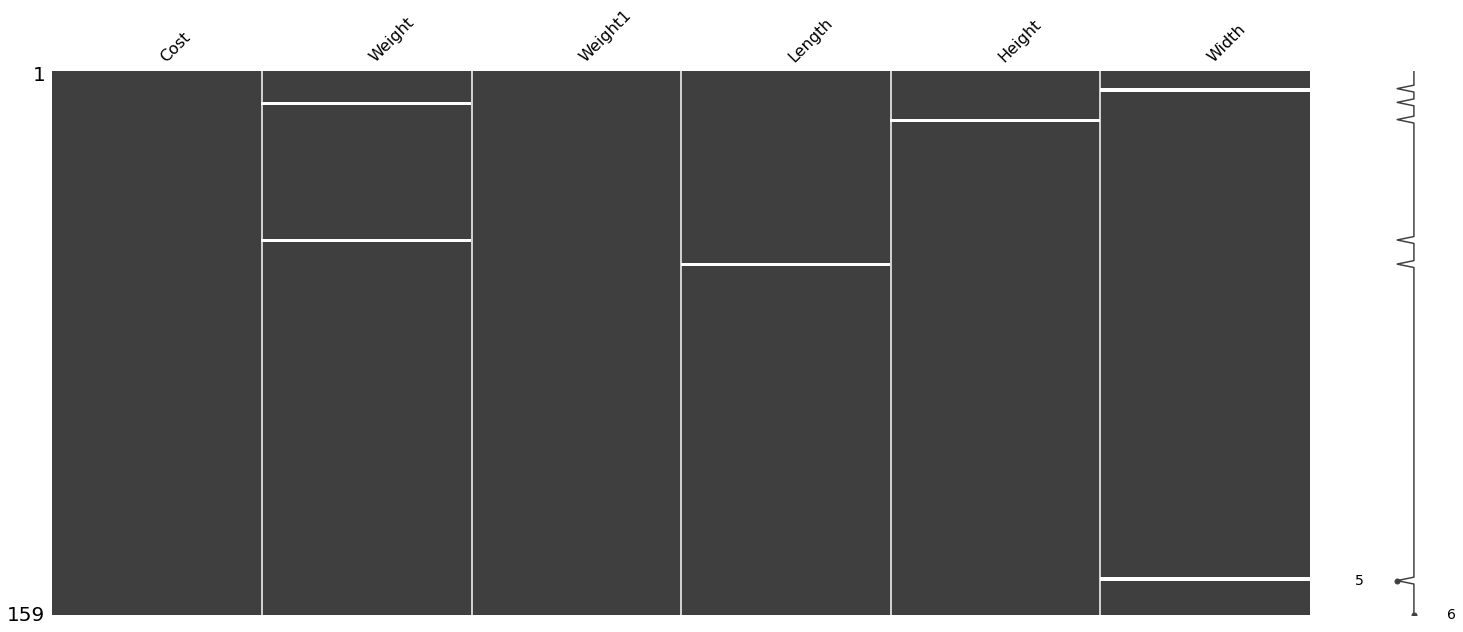

In [7]:
# Check missing values or null values. it can be done by below methods
df.info()
print(df.isnull().sum())
print(df.isna().sum())

# plot to see if there are null values existing
msno.matrix(df)
plt.show()

In [8]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,157.000000,159.000000,158.000000,158.000000,157.000000
mean,398.326415,26.259873,28.415723,31.239241,8.933124,3826.050502
std,357.978317,10.052942,10.716328,11.646141,4.273069,47884.860134
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.125000,5.940600,3.395700
50%,273.000000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.675000,12.248700,5.589000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


In [9]:
#For numeric variable, lets use mean or median to impute the missing values
# As Width has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers

In [10]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df['Length'].fillna(df['Length'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)
# we can convert all null values with beolow line of code
#df.fillna(df.median(), inplace=True)
df.head(15)

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
5,450.0,26.8,29.7,34.7,13.6024,4.2485
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35.0,12.6700,4.6900
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,25.2,30.7,36.2,14.2266,4.9594


In [11]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.246541,28.415723,31.229560,8.925576,3777.977521
std,357.978317,9.989816,10.716328,11.609869,4.260588,47582.744610
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,273.000000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


In [12]:
#now again check data quality
df.info()
print(df.isnull().sum())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB
Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64
Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64


### from above output, we can determine, there are no null or missing values 

<AxesSubplot:xlabel='variable', ylabel='value'>

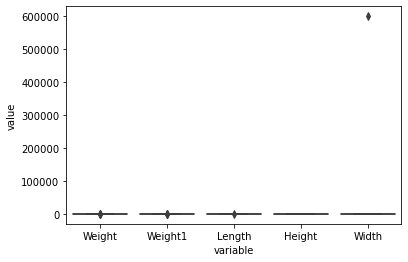

In [13]:
# Find outliers from independent variable

# box plot for independent variables
sns.boxplot(x="variable", y="value", data=pd.melt(df[['Weight', 'Weight1','Length','Height', 'Width']]))

<AxesSubplot:xlabel='variable', ylabel='value'>

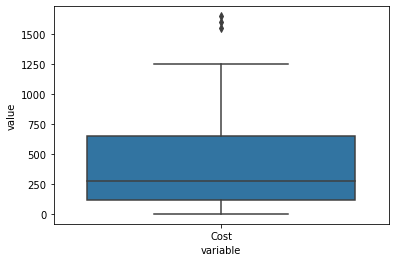

In [14]:
# Find outliers from dependent variable

# box plot for dependent variables
sns.boxplot(x="variable", y="value", data=pd.melt(df[['Cost']]))

In [15]:
# from above 2 plots, we can see outliers on cost and Width

In [16]:
# Remove outliers using interquartile range (IQR) lso called the midspread or middle 50%, #or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles,
#IQR = Q3 − Q1.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# print outliers across dataset
print(df[((df< (Q1 - 1.5 * IQR)) |(df >(Q3 + 1.5 * IQR))).any(axis=1)])

# Remove outliers from dataset
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

       Cost  Weight  Weight1  Length  Height       Width
142  1600.0    56.0     60.0    64.0   9.600  600000.000
143  1550.0    56.0     60.0    64.0   9.600       6.144
144  1650.0    59.0     63.4    68.0  10.812       7.480


(156, 6)

In [17]:
# Dependent variable 'Cost' has a minimum value of 0. Remove 0 to avoid unreasonable bias
df.drop(df[df['Cost'] == 0].index, inplace =True)
df.shape

(155, 6)

<center><h1> Plotting Graphs and  find Correlation </h1></center>

             Cost    Weight   Weight1    Length    Height     Width
Cost     1.000000  0.894028  0.899734  0.907314  0.799218  0.920578
Weight   0.894028  1.000000  0.998520  0.989318  0.671774  0.878334
Weight1  0.899734  0.998520  1.000000  0.993018  0.690720  0.885321
Length   0.907314  0.989318  0.993018  1.000000  0.753274  0.886055
Height   0.799218  0.671774  0.690720  0.753274  1.000000  0.788121
Width    0.920578  0.878334  0.885321  0.886055  0.788121  1.000000


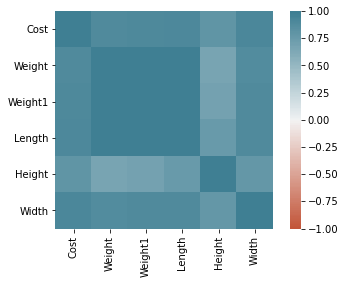

In [18]:
# identify and  Visualize the correlation between the independent variables
correlation = df.corr()

print(correlation)
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    #, cmap="OrRd"
)


C:\Users\JAGADISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JAGADISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


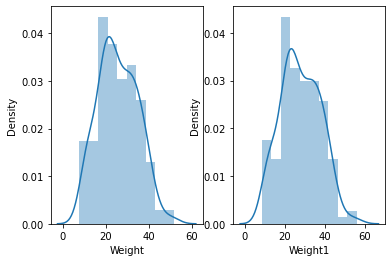

In [19]:
#Prepare a layout two render these categorical attributes
plt.figure(1) 

plt.subplot(121) 
sns.distplot(df['Weight'], hist=True, kde=True); 

plt.subplot(122) 
sns.distplot(df['Weight1'], hist=True, kde=True); 


C:\Users\JAGADISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JAGADISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JAGADISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='Length', ylabel='Density'>

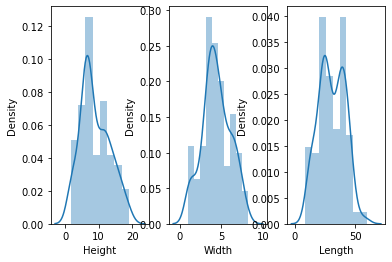

In [20]:

plt.subplot(131) 
sns.distplot(df['Height'], hist=True, kde=True); 

plt.subplot(132) 
sns.distplot(df['Width'], hist=True, kde=True); 

plt.subplot(133) 
sns.distplot(df['Length'], hist=True, kde=True)

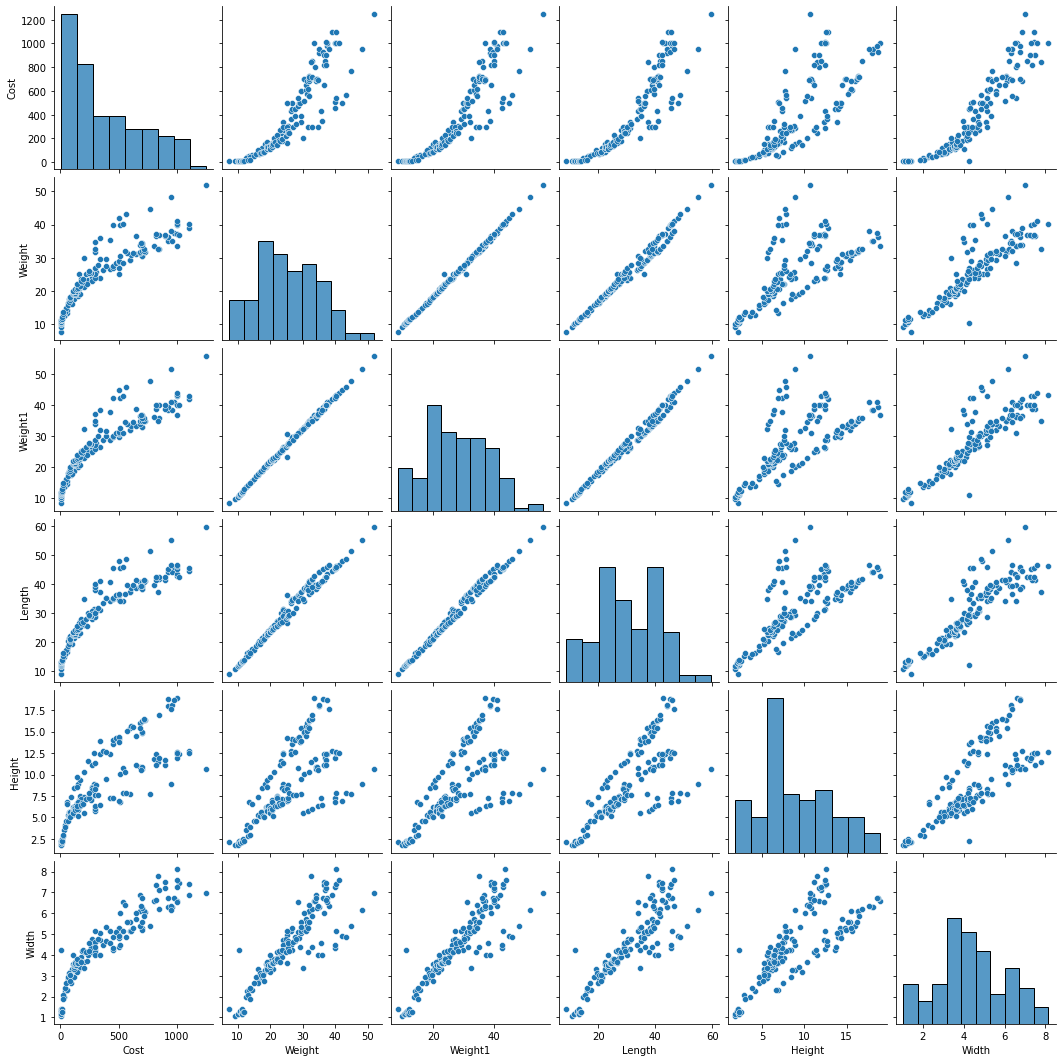

In [21]:
# Find how much the different features are significant using pair plot

sns.pairplot(df)

In [22]:
# drop highly correlated features
# Weight, Weight1 are highly correlated. Drop Weight.
# Keep Weight1 as Weight1 (.899) is more correlated with cost in comparision to Weight (.895).

df.drop('Weight', axis =1, inplace = True)
df.shape
#im dropping Weight for this assignment as it removes the correlated feature and  feature reduction helps with model

(155, 5)

<center><h1> Feature scaling and get Train-Test set</h1></center>

In [23]:
# Prepare the  matrix of the independent variables and vector of dependent vector. 
# Cost  is the dependent variable
# X is matrix of independent variables
X = df.iloc[:, 1:]

# y is vactor of dependent varible
y = df.iloc[:,0]

# scale the features using standard scaler. This will help in faster conversion while using gradient descent
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split train and test daa in 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)  
print(X_train, X_test, y_train, y_test)

[[ 5.79686213e-01  7.56422724e-01  1.29333962e+00  8.05741055e-01]
 [-4.43328281e-01 -5.26740444e-01 -6.16129756e-01 -4.06429291e-01]
 [-3.92177557e-01 -4.79909672e-01 -5.92840136e-01 -3.45899462e-01]
 [ 6.81987663e-01  8.50084269e-01  1.53762445e+00  5.34870072e-01]
 [-1.87574658e-01 -1.33361955e-01 -1.01804189e-02  6.07399256e-02]
 [-5.45827734e-02 -1.80192727e-01 -1.39158335e-01  4.48433477e-01]
 [-4.94479006e-01 -5.73571217e-01 -8.62184593e-01 -4.66353821e-01]
 [ 8.35439837e-01  1.01867505e+00  1.76919314e+00  8.80737512e-01]
 [ 5.08075199e-01  3.16213462e-01  2.58395481e-01  9.81519677e-01]
 [-8.01383355e-01 -9.01386625e-01 -8.93974925e-01 -9.83278557e-01]
 [-5.45629731e-01 -5.26740444e-01 -5.52083301e-01 -6.48548605e-01]
 [ 5.79686213e-01  7.47056569e-01  1.56331290e+00  4.46314933e-01]
 [-1.34358104e+00 -1.32286358e+00 -4.82796681e-01 -1.25293894e+00]
 [ 1.09119346e+00  1.26219507e+00  2.12317208e+00  1.15602717e+00]
 [-6.99081905e-01 -7.60894307e-01 -7.51791793e-01 -4.41233942e

In [24]:
df.describe()

,Cost,Weight1,Length,Height,Width
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,377.638065,27.833548,30.623871,8.920512,4.396453
std,319.144511,9.806718,10.711349,4.307677,1.657433
min,5.900000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.926950,3.401600
50%,272.000000,27.000000,29.400000,7.680000,4.248500
75%,615.000000,35.000000,39.450000,12.365900,5.472750
max,1250.000000,56.000000,59.700000,18.957000,8.142000


<center><h2>Functions for prediction values, cost and R-Suqare, RMSE, and MSE </h2></center>

In [25]:
#functions to  calculate cost, predict and  print results

def calculate_cost(theta, X, y):
    m = len(y)
    y_hat = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(y_hat - y))
    
    return cost

predict = lambda X, weights : X.dot(weights)

def predict(theta, X_test, y_test):
    
    weights = np.array([theta[0][0],theta[1][0],theta[2][0],theta[3][0],theta[4][0]])
    y_pred = np.zeros(len(y_test)) 
    X_test_calc = np.concatenate((np.ones((len(X_test), 1)), X_test), axis = 1)    
    
    for i, X_i in enumerate(X_test_calc):
        y_pred[i] =  X_i.dot(weights)
    
    return y_pred

def print_results(y_test, y_pred):
            
    print('R squared (Variance score) = %.2f' % r2_score(y_test, y_pred))    
    print("RMSE (Root mean squared error) = %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
    print("MSE (Mean squared error) = %.2f" % mean_squared_error(y_test, y_pred))  



<center><h2> Algorithms for  OLS, Gradient Descent, SGD, and Mini Batch Gradients and optimization of algorithms</h2></center>

In [26]:
'''
Implementations to optimize the cost
1. Normal Function
2. Stochastic gradient descent- in built SK Learn function
3. Gradient Descent
4. Mini-batch gradient descent
5. Stochastic gradient descent by defining fucntions
'''
                  
def normal_equation(X_train, y_train, X_test, y_test):
    # Multiple Linear Regression equation

    OLS_regressor = LinearRegression(normalize = True)
    OLS_regressor.fit(X_train, y_train)

    y_pred = OLS_regressor.predict(X_test)
    print('Intercept',OLS_regressor.intercept_)
    print('Coeffient',OLS_regressor.coef_)
    print_results(y_test, y_pred)
    

def stochastic_gradient_descent_SKLearn (X_train, y_train, X_test, y_test, tol, learning_rate, iterations): 

    sgd_regressor = SGDRegressor(max_iter =iterations, tol = tol, eta0 = learning_rate)
    sgd_regressor.fit(X_train, y_train)
    
    y_pred =  sgd_regressor.predict(X_test)
    print('Intercept',sgd_regressor.intercept_)
    print('Coeffient',sgd_regressor.coef_)
    print_results(y_test, y_pred)
    

def gradient_descent (X_train, y_train, X_test, y_test, learning_rate, iterations):    

    '''
    theta : vector of gradients
    X_train, X_test: train testset feature matrix
    y_train, y_test: train, test set of the dependent variable vactor
    y_pred: predicted dependent variable vector
    '''
    
    m = len(y_train)
    cost_history = np.zeros(iterations)
    
    
    theta = np.random.randn(X_train.shape[1] + 1 , 1)        
    X_train = np.concatenate((np.ones((len(X_train), 1)), X_train), axis = 1)   
    y_train = np.array(y_train).reshape(len(y_train), 1)
    
    for iteration in range(iterations):
        y_hat = np.dot(X_train, theta)
        theta = theta - (1/m) * learning_rate * (X_train.T.dot((y_hat - y_train)))
        cost_history[iteration] = calculate_cost(theta, X_train, y_train)
        
        # print cost history to see if it is converging
    #print(cost_history[iteration])
    
    y_pred = predict(theta, X_test, y_test)
    print(theta)
    print_results(y_test, y_pred)
                
def mini_batch_gradient_descent (X_train, y_train, X_test, y_test, learning_rate, iterations, batch_size):
   
    '''
    theta : vector of gradients
    X_train, X_test: train testset feature matrix
    y_train, y_test: train, test set of the dependent variable vactor
    y_pred: predicted dependent variable vector
    '''
    m = len(y_train)    
    cost_history = np.zeros(iterations)  
    
    theta = np.random.randn(X_train.shape[1] + 1 , 1)        
    y_train = np.array(y_train).reshape(len(y_train), 1) 
    
    
    for iteration in range(iterations):
        
        cost = 0.0        
        indices = np.random.permutation(m)
        X_train = X_train[indices]
        y_train = y_train[indices]
       
        for i in range( 0, m, batch_size):
            X_i = X_train[i : i + batch_size]
            y_i = y_train[i : i + batch_size]
            
            X_i = np.concatenate((np.ones((len(X_i), 1)), X_i), axis = 1)           
           
            y_hat = np.dot(X_i, theta)
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((y_hat - y_i)))
            cost += calculate_cost(theta, X_i, y_i)
            
        cost_history[iteration] = cost
         
        # print cost history to see if it is converging
        #print(cost_history[iteration])
    
    y_pred = predict(theta, X_test, y_test)
    print(theta)
    print_results(y_test, y_pred)
    
def stochastic_gradient_descent (X_train, y_train, X_test, y_test, learning_rate, iterations):
    
    '''
    theta : vector of gradients
    X_train, X_test: train testset feature matrix
    y_train, y_test: train, test set of the dependent variable vactor
    y_pred: predicted dependent variable vector
    '''
    m = len(y_train)    
    cost_history = np.zeros(iterations)  
    
    theta = np.random.randn(X_train.shape[1] + 1 , 1)        
    X_train = np.concatenate((np.ones((len(X_train), 1)), X_train), axis = 1)   
    y_train = np.array(y_train).reshape(len(y_train), 1)    
    
    for iteration in range(iterations):
        
        cost = 0.0        
        for i in range(m):
            
            rand_index = np.random.randint(0, m)
            
            X_i = X_train[rand_index,:].reshape(1, X_train.shape[1])
            y_i = y_train[rand_index,:].reshape(1, 1)
            
            y_hat = np.dot(X_i, theta)            
           
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((y_hat - y_i)))
            cost += calculate_cost(theta, X_i, y_i)
            
        cost_history[iteration] = cost
         
        # print cost history to see if it is converging
        #print(cost_history[iteration])
    
    y_pred = predict(theta, X_test, y_test)
    print(theta)
    print_results(y_test, y_pred)

## Evaluation of each model with R squared, RMSE and MSE for the model

<center><h2> Normal Equation method/OLS </h2></center>

In [27]:
normal_equation(X_train, y_train, X_test, y_test)

Intercept 375.55695221381797
Coeffient [ 337.81586504 -215.72708354   96.25746333  117.54630441]
R squared (Variance score) = 0.89
RMSE (Root mean squared error) = 103.26
MSE (Mean squared error) = 10663.12


#### From above result, Intercept is 375 and coeffiecents are for 5 features are dereived and R Square is otpimal 

<center><h2>Stochastic Gradient Descent- SK Learn</h2></center>

In [48]:
stochastic_gradient_descent_SKLearn (X_train, y_train, X_test, y_test, tol = 0.01, learning_rate=0.01, iterations=1000)

Intercept [374.9726481]
Coeffient [ 78.77794707  60.9171202   58.39408237 129.08830776]
R squared (Variance score) = 0.89
RMSE (Root mean squared error) = 103.62
MSE (Mean squared error) = 10736.57


<center><h2>Stochastic Gradient Descent from defined functions</h2></center>

In [38]:
stochastic_gradient_descent (X_train, y_train, X_test, y_test, learning_rate=0.01, iterations =1000)

[[374.34521468]
 [ 76.4757209 ]
 [ 61.69837472]
 [ 59.43409373]
 [126.66351324]]
R squared (Variance score) = 0.89
RMSE (Root mean squared error) = 102.57
MSE (Mean squared error) = 10520.80


#### from above results Theta 0 is 375 which is intercept and rest all coefficents of features .from R square, model is optimal

<center><h2>Gradient Descent</h2></center>

In [42]:
gradient_descent(X_train, y_train, X_test, y_test, learning_rate =0.01, iterations =1000)

[[374.75709843]
 [ 77.78321362]
 [ 62.94296499]
 [ 58.84094543]
 [127.68814437]]
R squared (Variance score) = 0.89
RMSE (Root mean squared error) = 103.64
MSE (Mean squared error) = 10740.34


#### from above results Theta 0 is 375 which is intercept and rest all coefficents of features.

<center><h2>Mini-batch Gradient Descent</h2></center>

In [62]:
mini_batch_gradient_descent(X_train, y_train, X_test, y_test, learning_rate = 0.01, iterations =800 , batch_size = 20)  

[[374.60596907]
 [ 79.66233546]
 [ 64.6925297 ]
 [ 60.75341576]
 [122.19993543]]
R squared (Variance score) = 0.89
RMSE (Root mean squared error) = 103.51
MSE (Mean squared error) = 10715.33


#### from above results Theta 0 is 375 which is intercept and rest all coefficents of features.

<left><h1> Observations & Conclusions </h1></left>